<a href="https://colab.research.google.com/github/jasim-1863/SDCProjects/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intercept: [4.14291332]
Coefficient: [[2.79932366]]
Mean Squared Error: 0.6536995137170021
R² Score: 0.8072059636181392


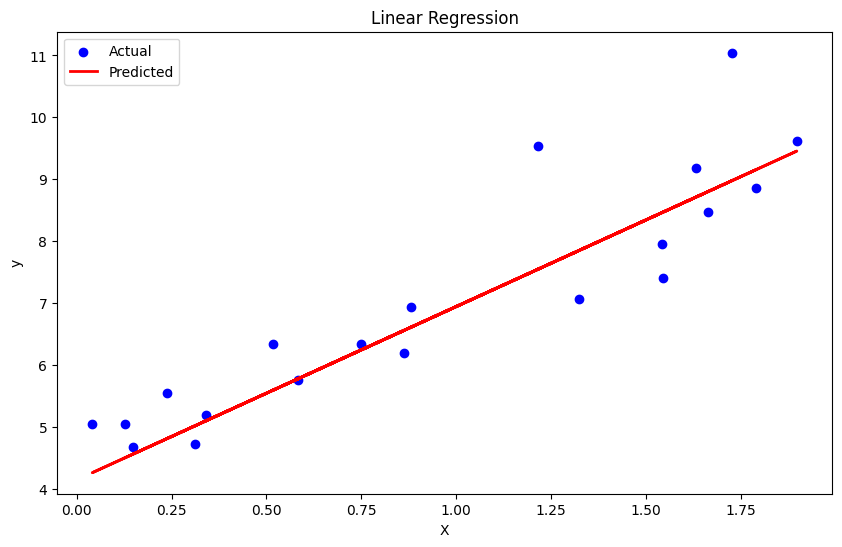


Manual Implementation:
Weights: [2.95553445]
Bias: 3.96767082704318
Mean Squared Error: 0.6926651409345591


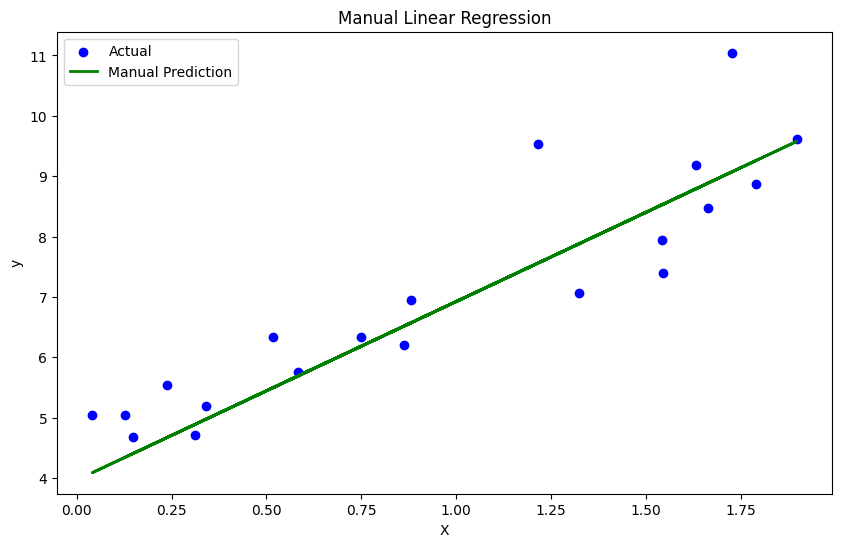

In [15]:
# Linear Regression Implementation for Google Colab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Make sure the plot is displayed in the notebook
%matplotlib inline

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Manual implementation of Linear Regression using Gradient Descent
class ManualLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Test the manual implementation
manual_model = ManualLinearRegression(learning_rate=0.01, n_iterations=1000)
manual_model.fit(X_train, y_train.ravel())
manual_predictions = manual_model.predict(X_test)

print("\nManual Implementation:")
print(f"Weights: {manual_model.weights}")
print(f"Bias: {manual_model.bias}")
print(f"Mean Squared Error: {mean_squared_error(y_test, manual_predictions.reshape(-1, 1))}")

# Plot manual implementation results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, manual_predictions, color='green', linewidth=2, label='Manual Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Manual Linear Regression')
plt.legend()
plt.show()